# 1. Read, Visualise and clean the data

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

countries = pd.read_csv('Country-data.csv')
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# converting 'exports', 'health', 'imports' from percentages of gdpp

countries['exports'] = (countries['exports']/100)*countries['gdpp']
countries['health'] = (countries['health']/100)*countries['gdpp']
countries['imports'] = (countries['imports']/100)*countries['gdpp']

In [4]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
# Checking the missing values

countries.isnull().any()

# This data does not have any missing values

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [6]:
# checking the outliers

countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


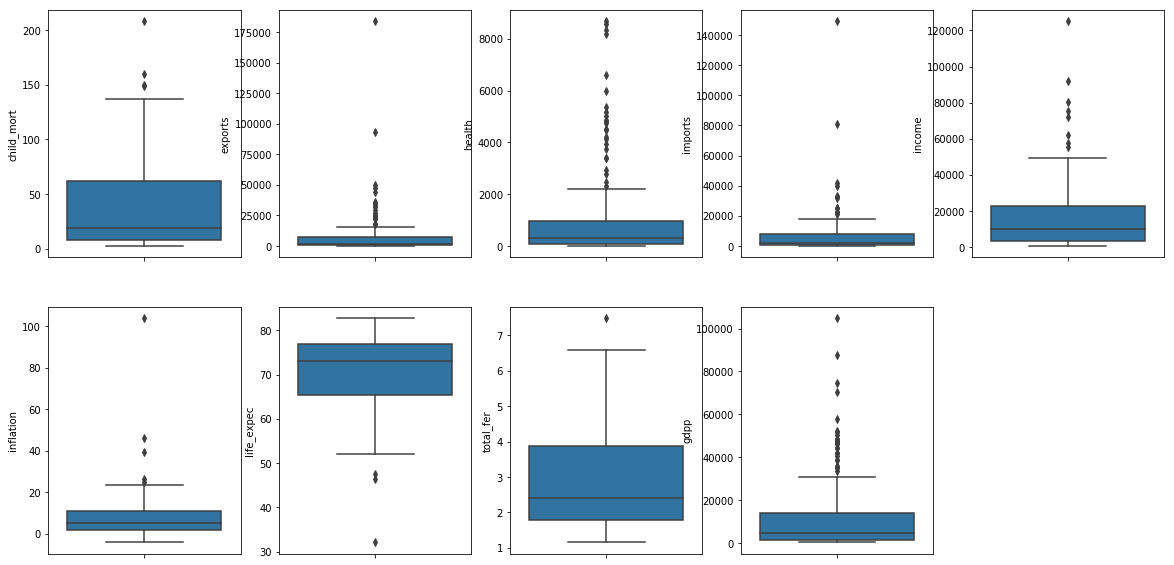

In [7]:
# Box plot of 'child_mort'

plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
sns.boxplot(countries['child_mort'],orient='v')
plt.subplot(2,5,2)
sns.boxplot(countries['exports'],orient='v')
plt.subplot(2,5,3)
sns.boxplot(countries['health'],orient='v')
plt.subplot(2,5,4)
sns.boxplot(countries['imports'],orient='v')
plt.subplot(2,5,5)
sns.boxplot(countries['income'],orient='v')
plt.subplot(2,5,6)
sns.boxplot(countries['inflation'],orient='v')
plt.subplot(2,5,7)
sns.boxplot(countries['life_expec'],orient='v')
plt.subplot(2,5,8)
sns.boxplot(countries['total_fer'],orient='v')
plt.subplot(2,5,9)
sns.boxplot(countries['gdpp'],orient='v')
# countries['child_mort'].quantile([0.5,0.7,0.9,0.95,0.99])

In [8]:
# removing (statistical) outliers by capping them

#outlier treatment for child_mort
Q4 = countries.child_mort.quantile(0.99)
countries['child_mort'][countries['child_mort']>=Q4] = Q4

# outlier treatment for exports
Q4 = countries.exports.quantile(0.9)
countries['exports'][countries['exports']>=Q4] = Q4

#outlier treatment for health
Q4 = countries.health.quantile(0.88)
countries['health'][countries['health']>=Q4] = Q4

#outlier treatment for imports
Q4 = countries.imports.quantile(0.95)
countries['imports'][countries['imports']>=Q4] = Q4

#outlier treatment for income
Q4 = countries.income.quantile(0.95)
countries['income'][countries['income']>=Q4] = Q4

#outlier treatment for inflation
Q4 = countries.inflation.quantile(0.98)
countries['inflation'][countries['inflation']>=Q4] = Q4

#outlier treatment for life_expec
Q1 = countries.life_expec.quantile(0.01)
countries['life_expec'][countries['life_expec']<=Q1] = Q1

#outlier treatment for total_fer
Q4 = countries.total_fer.quantile(0.99)
countries['total_fer'][countries['total_fer']>=Q4] = Q4

#outlier treatment for gdpp
Q4 = countries.gdpp.quantile(0.87)
countries['gdpp'][countries['gdpp']>=Q4] = Q4

In [9]:
countries.shape

(167, 10)

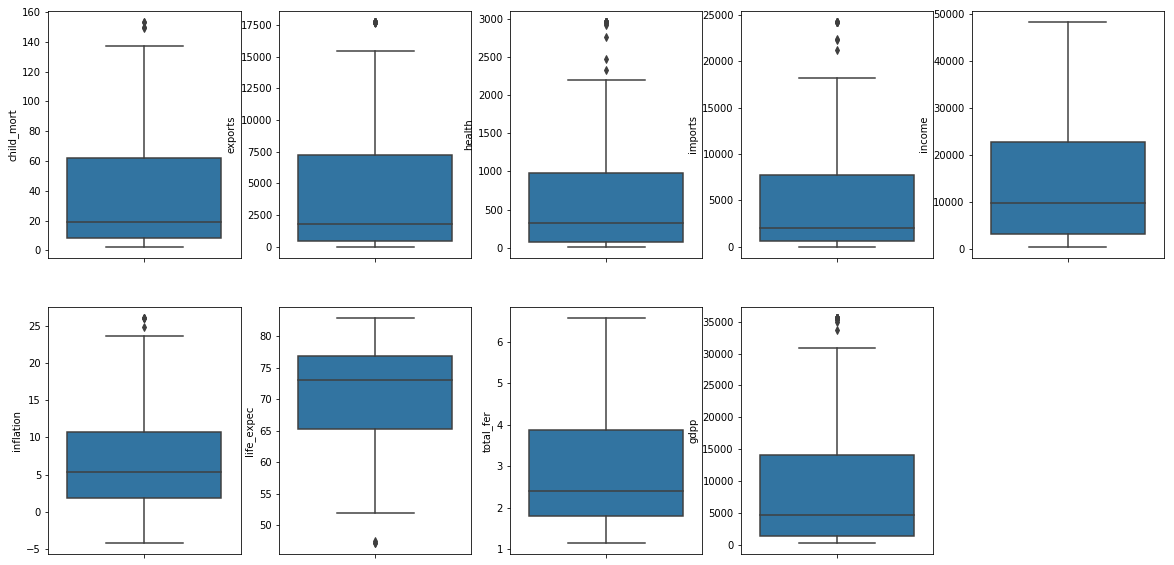

In [10]:
# Box plot of 'child_mort'

plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
sns.boxplot(countries['child_mort'],orient='v')
plt.subplot(2,5,2)
sns.boxplot(countries['exports'],orient='v')
plt.subplot(2,5,3)
sns.boxplot(countries['health'],orient='v')
plt.subplot(2,5,4)
sns.boxplot(countries['imports'],orient='v')
plt.subplot(2,5,5)
sns.boxplot(countries['income'],orient='v')
plt.subplot(2,5,6)
sns.boxplot(countries['inflation'],orient='v')
plt.subplot(2,5,7)
sns.boxplot(countries['life_expec'],orient='v')
plt.subplot(2,5,8)
sns.boxplot(countries['total_fer'],orient='v')
plt.subplot(2,5,9)
sns.boxplot(countries['gdpp'],orient='v')
# countries['child_mort'].quantile([0.5,0.7,0.9,0.95,0.99])

In [11]:
countries.shape

(167, 10)

In [12]:
# Hopkins Statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
hopkins(countries.drop(['country'], axis=1))

0.907329966744887

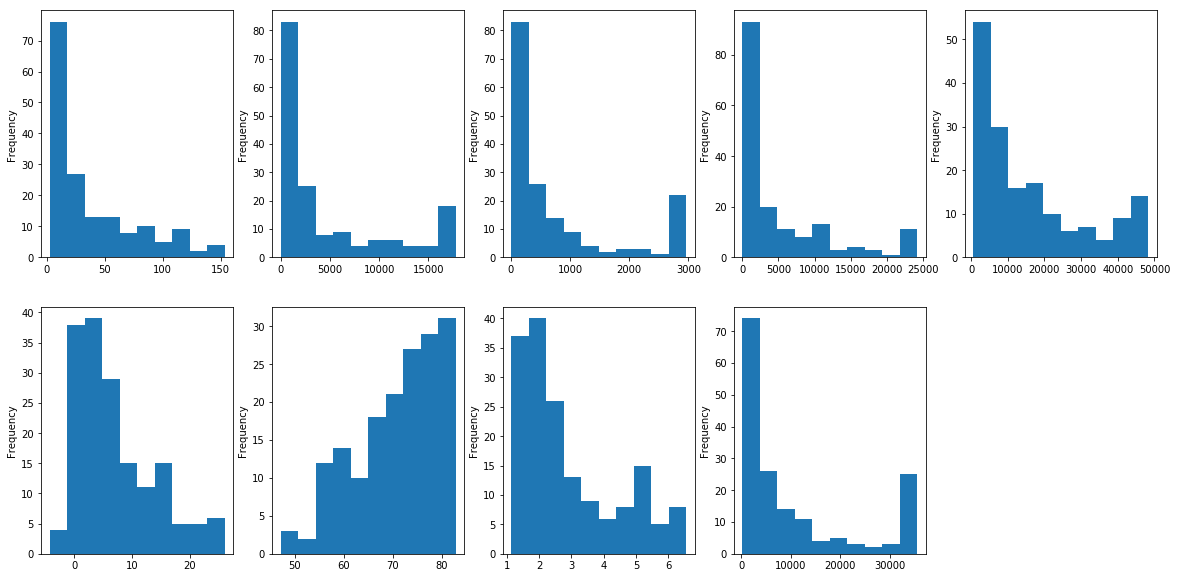

In [14]:
# Univariate Analysis

plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
countries['child_mort'].plot.hist()
plt.subplot(2,5,2)
countries['exports'].plot.hist()
plt.subplot(2,5,3)
countries['health'].plot.hist()
plt.subplot(2,5,4)
countries['imports'].plot.hist()
plt.subplot(2,5,5)
countries['income'].plot.hist()
plt.subplot(2,5,6)
countries['inflation'].plot.hist()
plt.subplot(2,5,7)
countries['life_expec'].plot.hist()
plt.subplot(2,5,8)
countries['total_fer'].plot.hist()
plt.subplot(2,5,9)
countries['gdpp'].plot.hist()
plt.show()


<Figure size 3600x3600 with 0 Axes>

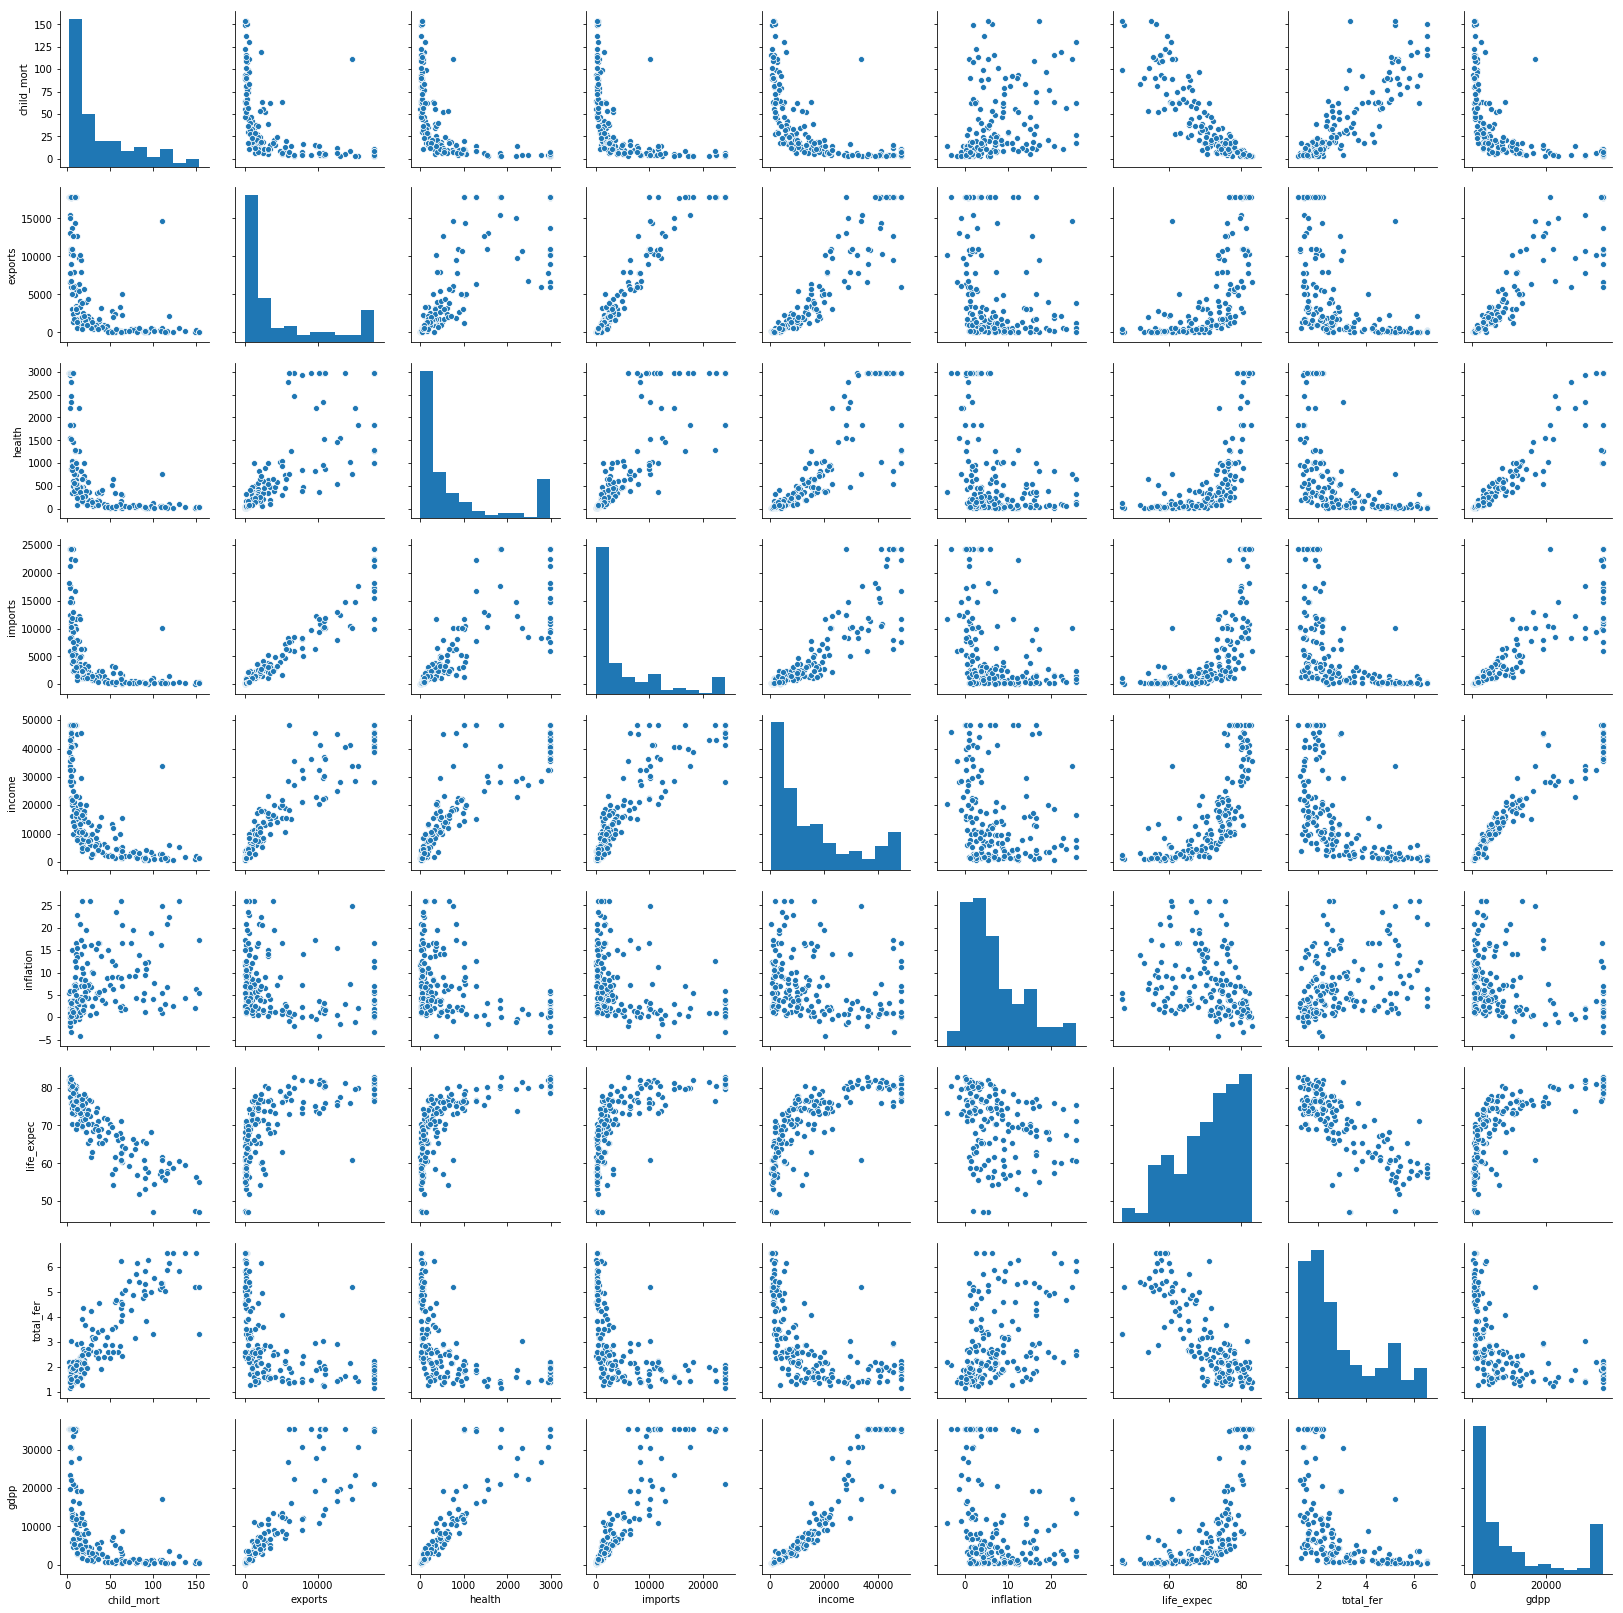

In [15]:
# Bivariate analysis

plt.figure(figsize=(50,50))
sns.pairplot(countries)
plt.show()

In [16]:
# Scaling the columns

countries_columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
scaler = StandardScaler()
countries_scaled = scaler.fit_transform(countries[countries_columns])
countries_scaled.shape

(167, 9)

In [17]:
countries_scaled = pd.DataFrame(countries_scaled)
countries_scaled.columns = countries_columns
countries_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,1.063687e-17,-7.578768e-17,2.858658e-17,4.387708e-17,9.972063e-18,-1.156759e-16,2.738993e-16,1.223240e-16,-1.462569e-16
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-9.072942e-01,-8.065221e-01,-7.645443e-01,-7.698228e-01,-1.026246e+00,-1.662013e+00,-2.752278e+00,-1.199761e+00,-8.534478e-01
25%,-7.620905e-01,-7.305413e-01,-6.976970e-01,-6.740243e-01,-8.399862e-01,-7.784070e-01,-6.268330e-01,-7.679895e-01,-7.637908e-01
50%,-4.781081e-01,-5.039426e-01,-4.501506e-01,-4.635184e-01,-3.919713e-01,-2.529404e-01,2.870851e-01,-3.563007e-01,-4.921278e-01
75%,6.218421e-01,4.330038e-01,2.161980e-01,3.863780e-01,4.789614e-01,5.337916e-01,7.206103e-01,6.277359e-01,2.739131e-01
max,2.968231e+00,2.218574e+00,2.240341e+00,2.861159e+00,2.207939e+00,2.770400e+00,1.423624e+00,2.424172e+00,2.024631e+00


# 2. Clustering

In [18]:
# Using KMeans algorithm to perform clustering
# Initially taking number of clusters as 4 randomly

kmeans = KMeans(n_clusters=4, max_iter=50 )
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
kmeans.labels_

array([2, 3, 1, 2, 3, 1, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 3, 2, 1, 1, 3, 1,
       3, 0, 3, 2, 2, 1, 2, 0, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 0, 0,
       0, 3, 1, 1, 3, 2, 2, 3, 1, 0, 0, 1, 2, 1, 0, 2, 0, 3, 1, 2, 2, 1,
       2, 3, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 3, 3, 2,
       2, 3, 3, 0, 3, 2, 2, 3, 3, 2, 0, 2, 3, 1, 1, 1, 3, 3, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 3, 2, 3, 1, 3, 1, 3, 0, 0, 3, 1, 2, 1, 3, 2, 3, 3,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 2, 1, 3, 3,
       1, 2, 1, 0, 0, 0, 3, 1, 1, 1, 1, 1, 2])

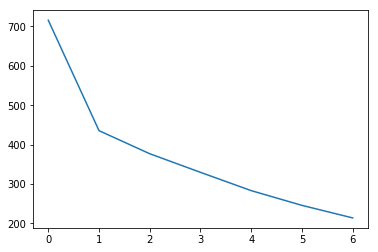

[715.5070652907656, 435.4198845461743, 376.86294203687316, 329.66794757336595, 283.2844552561945, 245.91488401293014, 214.07165033268166]


In [20]:
# Finding the optimal nuumber of clusters using elbow curve

ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_of_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_of_clusters, max_iter=50)
    kmeans.fit(countries_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(ssd)
plt.show()
print(ssd)

### By looking at the above curve, the elbow is at 3 clusters. After 3, the inertia value does not change by a significant margin. So we can go ahead with 3 clusters.


###  

In [21]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_of_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_of_clusters, max_iter=50)
    kmeans.fit(countries_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(countries_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_of_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4899002971823022
For n_clusters=3, the silhouette score is 0.42931362624412306
For n_clusters=4, the silhouette score is 0.3125421033044424
For n_clusters=5, the silhouette score is 0.31567747253679757
For n_clusters=6, the silhouette score is 0.3255140237554254
For n_clusters=7, the silhouette score is 0.3075979473604836
For n_clusters=8, the silhouette score is 0.3390480396078925


#### Silhouette score is best for 2 clusters. However, the difference between the scores for 2 and 3 clusters is considerably less. So we can also take 3 clusters.


###  

In [22]:
# Building the final model using KMeans algorithm by taking 3 clusters

kmeans = KMeans(n_clusters=3, max_iter=50, random_state=100)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [23]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [24]:
# assigning the label

countries['cluster_id'] = kmeans.labels_
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


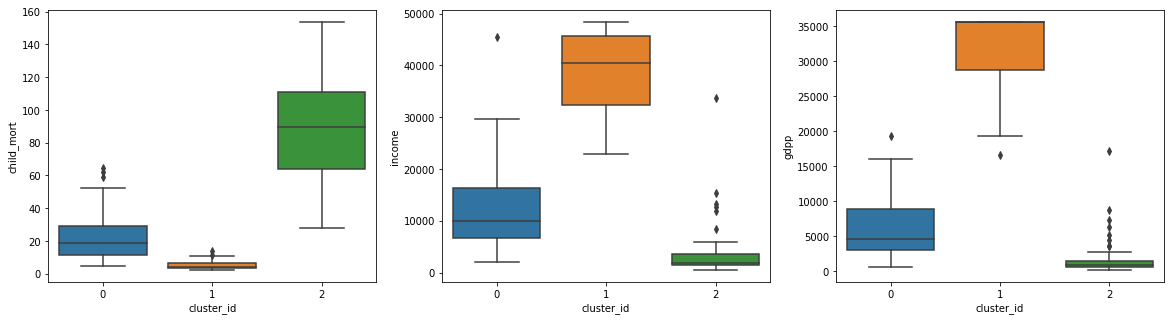

In [25]:
# cluster profiling for Kmeans algorithm

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='child_mort', data=countries)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='income', data=countries)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='gdpp', data=countries)
plt.show()

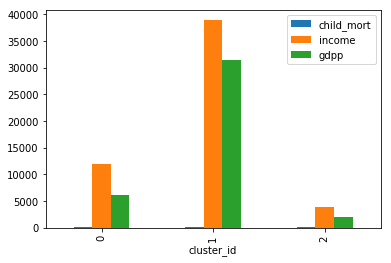

In [26]:
# cluster profiling for Kmeans algorithm

countries[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

#### By looking at the above box plots and the bar graph, we can see that the cluster 2 has countries with low income, low gdpp and high child mortality. So cluster 0 will be our target cluster.


###   

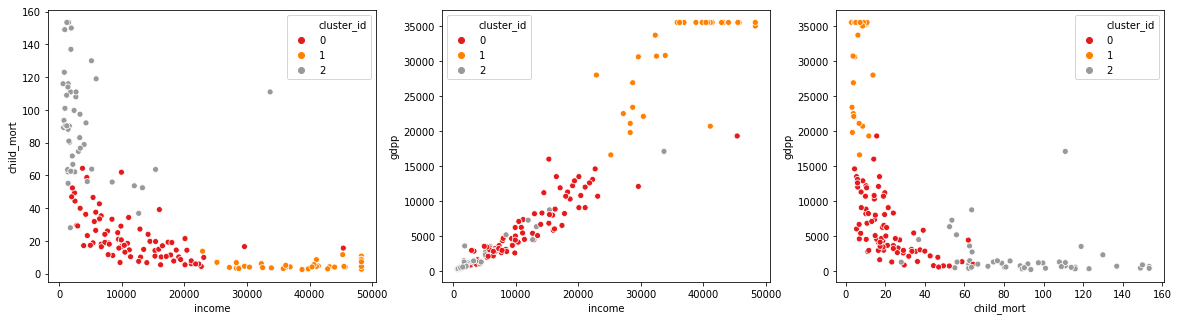

In [27]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = countries, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = countries, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = countries, palette='Set1')

#### The above scatterplots confirm that the cluster 2 has countries with highest child mortality, lowest income, lowesst gdpp


####  

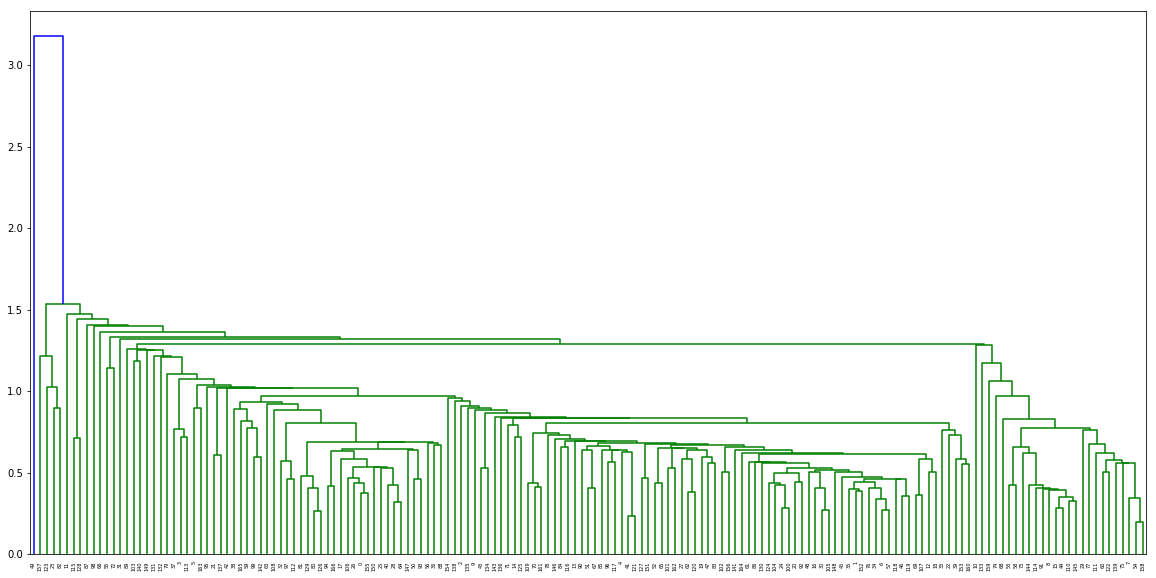

In [28]:
# Hierarchical clustering

# single linkage

mergings = linkage(countries_scaled, method='single', metric='euclidean')
plt.figure(figsize=(20,10))
dendrogram(mergings)
plt.show()

#### The above dendrogram is not easy to interpret and it is very clumsy. So it is imperative that we use complete linkage.


####  

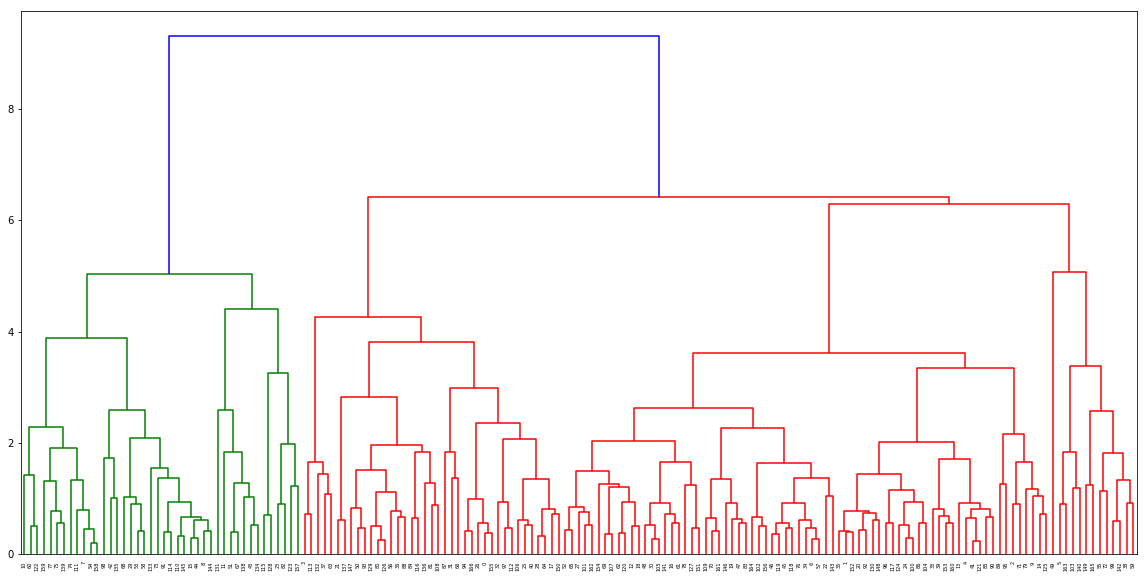

In [29]:
# Complete linkage

mergings = linkage(countries_scaled, method='complete', metric='euclidean')
plt.figure(figsize=(20,10))
dendrogram(mergings)
plt.show()

#### The above dendrogram is clear to analyze and cut it as we want. It indicates that we can easily cut it to form two clusters. However, we can cut it to form 3 clusters as well. Because the final scatterplots clearly shows the target countries if we make 3 clusters.


####   

In [30]:
# Cutting the tree to form 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0])

In [31]:
# assign cluster labels
countries['cluster_labels'] = cluster_labels
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


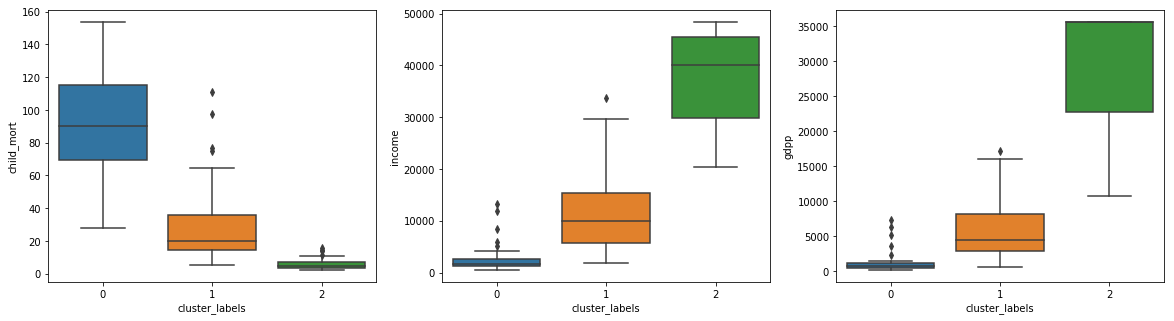

In [32]:
# cluster profiling for hierarchical algorithm

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels', y='child_mort', data=countries)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels', y='income', data=countries)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels', y='gdpp', data=countries)
plt.show()

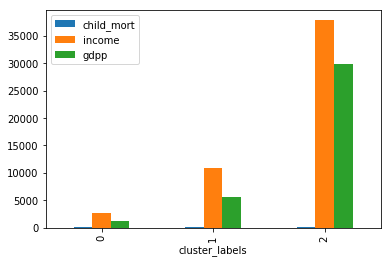

In [33]:
# # cluster profiling for hierarchical algorithm

countries[['child_mort', 'income', 'gdpp', 'cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

#### By looking at the above box plots and the bar graph, we can see that the cluster 0 has countries with low income, low gdpp and high child mortality. So cluster 0 will be our target cluster.


###   

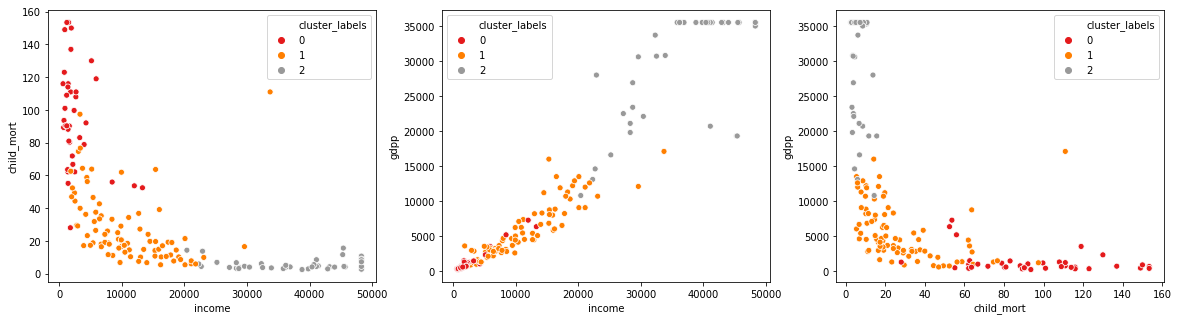

In [34]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = countries, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = countries, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = countries, palette='Set1')

#### The above scatterplots confirm that the cluster 0 (Red) has countries with highest child mortality, lowest income, lowesst gdpp


####  

In [35]:
# Extracting the top countries that are in direst need using kmeans clustering output

kmeans_countries_in_need = countries[countries['cluster_id']==2]
kmeans_countries_in_need = kmeans_countries_in_need.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False])
countries_in_urgent_need_kmeans = kmeans_countries_in_need.head(10)['country']
countries_in_urgent_need_kmeans

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

In [36]:
# Extracting the top countries that are in direst need using hierarchical clustering output

hierarchy_countries_in_need = countries[countries['cluster_labels']==0]
hierarchy_countries_in_need = hierarchy_countries_in_need.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False])
countries_in_urgent_need_hierarchy = hierarchy_countries_in_need.head(10)['country']
countries_in_urgent_need_hierarchy

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

#### By looking at the above two sets of countries, we can see that both the algorithms are giving the same countries as output. So, the CEO of HELP oraganization must consider  Burundi, Liberia,Congo, Dem. Rep., Niger, Sierra Leone, Madagascar, Mozambique, Central African Republic, Malawi, Eritrea to provide funding